## GE Stock prices prediction (using a proper window of size 20)
## Historical data of 5 years was downloaded from Yahoo Finance


## https://finance.yahoo.com/quote/GE/history?period1=1552798472&period2=1710651260
## has Date,Open, High, Low, Close, Adj Close and Volume
## only considering Open, High, Low, Close

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io
import tensorflow as tf
import pandas as pd

from tensorflow import keras

from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data=pd.read_csv('/content/drive/MyDrive/GE19to24.csv')
datamatrix=data.to_numpy()

print(datamatrix.shape)

print(datamatrix)

(1259, 7)
[['2019-03-18' 62.38876 64.387199 ... 63.700233 62.534439 14675056]
 ['2019-03-19' 63.825138 64.574554 ... 63.637783 62.473125 8755779]
 ['2019-03-20' 63.263077 64.5121 ... 63.825138 62.657059 7745246]
 ...
 ['2024-03-13' 165.509995 171.050003 ... 170.160004 170.160004 6754100]
 ['2024-03-14' 170.25 170.75 ... 166.75 166.75 7550500]
 ['2024-03-15' 165.649994 170.5 ... 168.889999 168.889999 10584700]]


In [4]:
datamatrix[0]

array(['2019-03-18', 62.38876, 64.387199, 62.263855, 63.700233, 62.534439,
       14675056], dtype=object)

In [5]:
x=datamatrix[:,1:5]
print(x[:6,:])
print(x.shape)

[[62.38876 64.387199 62.263855 63.700233]
 [63.825138 64.574554 63.325527 63.637783]
 [63.263077 64.5121 63.200626 63.825138]
 [63.700233 64.5121 63.263077 64.13739]
 [63.825138 63.950039 61.951599 62.326309]
 [62.201405 63.263077 61.264637 61.701794]]
(1259, 4)


In [6]:
N=1259*4
w=20
print(N)
x=np.reshape(x,N,)

5036


In [7]:
type(x)

numpy.ndarray

In [8]:
x.shape

(5036,)

In [9]:
# x2=np.reshape(x,N)

In [10]:
# x2.shape

In [11]:
# x[0:20],x[20]

In [12]:
def prepare_data(timeseries, n_steps):
	X, y =[],[]
	for i in range(0,len(timeseries)):
		# find the end of this pattern
		end_w = i + n_steps
		# check if we are beyond the sequence
		if end_w > len(timeseries)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = timeseries[i:end_w], timeseries[end_w]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [13]:
# define input sequence
timeseries = x
# choose a number of time steps
n_steps = 20
# split into samples
X, y = prepare_data(timeseries, n_steps)

In [14]:
X = np.asarray(X).astype('float32')
y = np.asarray(y).astype('float32')

In [15]:
# print(X[0]),print(y[0])
# print(X[1]),print(y[1])

In [16]:
X.shape

(5016, 20)

In [17]:
X

array([[ 62.38876 ,  64.3872  ,  62.263855, ...,  63.95004 ,  61.9516  ,
         62.32631 ],
       [ 64.3872  ,  62.263855,  63.700233, ...,  61.9516  ,  62.32631 ,
         62.201405],
       [ 62.263855,  63.700233,  63.825138, ...,  62.32631 ,  62.201405,
         63.263077],
       ...,
       [175.81    , 167.35    , 167.96    , ..., 165.63    , 166.75    ,
        165.65    ],
       [167.35    , 167.96    , 167.09    , ..., 166.75    , 165.65    ,
        170.5     ],
       [167.96    , 167.09    , 168.42    , ..., 165.65    , 170.5     ,
        164.89    ]], dtype=float32)

In [18]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
n_steps = 20
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [19]:
X = np.asarray(X).astype('float32')

In [20]:
X.shape

(5016, 20, 1)

In [21]:
# X[0:10,:].shape

In [22]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest,ztrain,ztest = train_test_split(X,y, test_size=0.25, random_state=25)

print(f"No. of training examples: {Xtrain.shape[0]}")
print(f"No. of testing examples: {Xtest.shape[0]}")

No. of training examples: 3762
No. of testing examples: 1254


In [23]:
# Xtrain=X[0:3763]
# Xtest=X[3763:5017]
# ztrain=y[0:3763]
# ztest=y[3763:5017]

In [24]:
# define model
n_steps = 20
n_features = 1
model = Sequential()
model.add(LSTM(250, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(250, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [25]:
# fit model
model.fit(Xtrain, ztrain, epochs=60,batch_size=100,verbose=2)

Epoch 1/60
38/38 - 26s - loss: 432.7760 - 26s/epoch - 681ms/step
Epoch 2/60
38/38 - 11s - loss: 11.3875 - 11s/epoch - 296ms/step
Epoch 3/60
38/38 - 9s - loss: 6.6157 - 9s/epoch - 231ms/step
Epoch 4/60
38/38 - 9s - loss: 6.3500 - 9s/epoch - 247ms/step
Epoch 5/60
38/38 - 8s - loss: 7.0886 - 8s/epoch - 221ms/step
Epoch 6/60
38/38 - 9s - loss: 6.1778 - 9s/epoch - 234ms/step
Epoch 7/60
38/38 - 9s - loss: 5.6973 - 9s/epoch - 247ms/step
Epoch 8/60
38/38 - 8s - loss: 5.7875 - 8s/epoch - 215ms/step
Epoch 9/60
38/38 - 9s - loss: 6.4415 - 9s/epoch - 239ms/step
Epoch 10/60
38/38 - 9s - loss: 5.2374 - 9s/epoch - 247ms/step
Epoch 11/60
38/38 - 8s - loss: 4.8329 - 8s/epoch - 208ms/step
Epoch 12/60
38/38 - 9s - loss: 13.1579 - 9s/epoch - 244ms/step
Epoch 13/60
38/38 - 10s - loss: 6.8236 - 10s/epoch - 259ms/step
Epoch 14/60
38/38 - 9s - loss: 5.6814 - 9s/epoch - 226ms/step
Epoch 15/60
38/38 - 9s - loss: 4.9460 - 9s/epoch - 238ms/step
Epoch 16/60
38/38 - 10s - loss: 4.8613 - 10s/epoch - 271ms/step
Epoch

In [26]:
Xpredicted=model.predict(Xtest)

40/40 [==============================] - 2s 48ms/step


In [27]:
len(Xpredicted),len(ztest)

(1254, 1254)

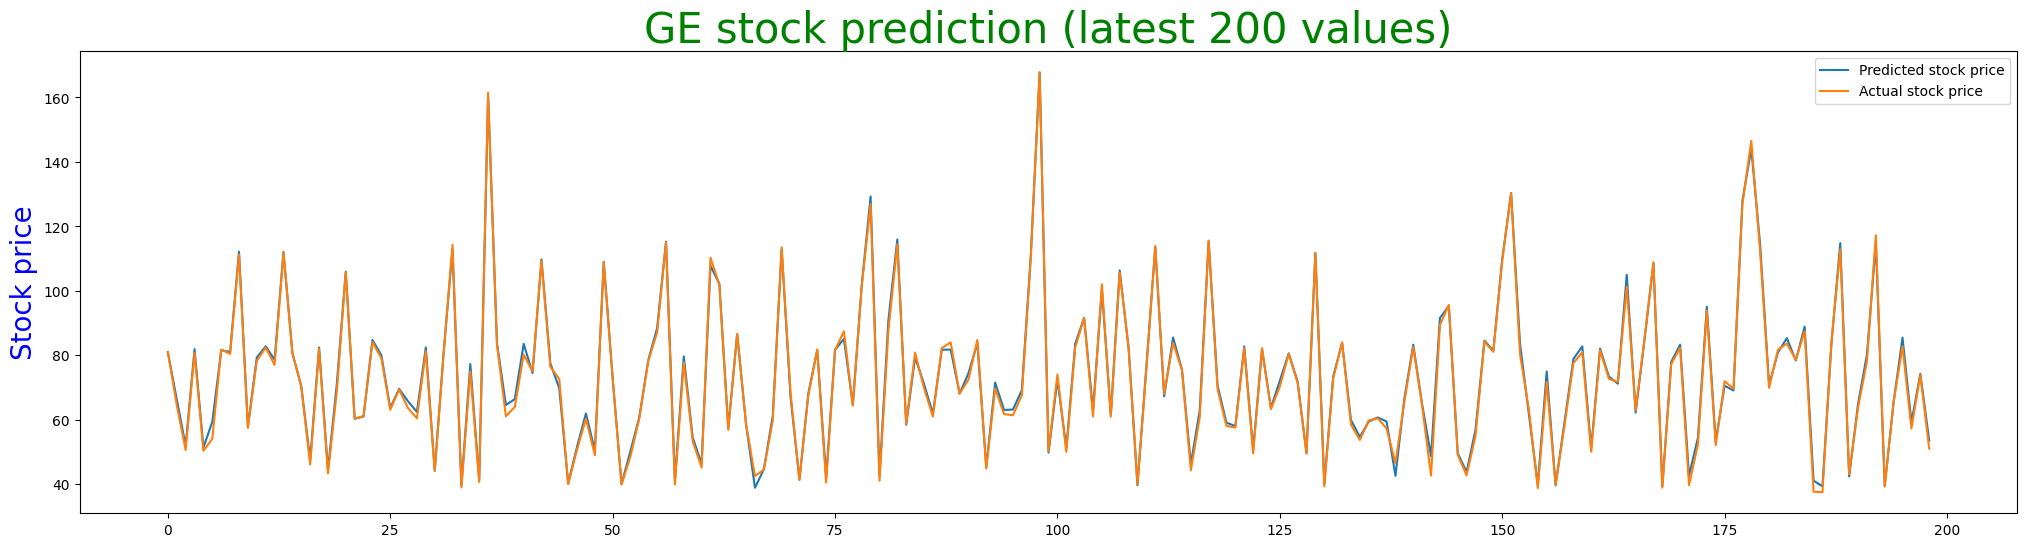

In [51]:
plt.figure(figsize=(25, 6), dpi=100)
plt.plot(Xpredicted[1055:1255],label='Predicted stock price') #[:201]
plt.plot(ztest[1055:1255],label='Actual stock price')
plt.legend()
plt.title(label="GE stock prediction (latest 200 values)", fontsize=30, color="green")
plt.ylabel("Stock price", fontsize=20, color="blue")
plt.show()

In [54]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
print('Mean absolute error=',mean_absolute_error(Xpredicted,ztest))
print('Root mean squared error=',(np.sqrt(mean_squared_error(Xpredicted,ztest))))
print('The average difference between the stock price predicted by the model and the actual stock price is',round(np.sqrt(mean_squared_error(Xpredicted,ztest)),2))

Mean absolute error= 1.1810663
Root mean squared error= 1.5239007
The average difference between the stock price predicted by the model and the actual stock price is 1.52
